In [20]:
## - - - - - - - - - - - - - - - - - - - - - - - - - - -
##      import libraries
## - - - - - - - - - - - - - - - - - - - - - - - - - - -

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.interpolate import griddata, UnivariateSpline
from matplotlib.pyplot import * # plotting library
import math
import pylab
from matplotlib import ticker
from mpmath import mp
import mpmath
from numpy import random

In [21]:
## - - - - - - - - - - - - - - - - - - - - - - - - - - -
##      plotting properties
## - - - - - - - - - - - - - - - - - - - - - - - - - - -

plt.rcParams.update({
	'text.usetex': True,
	'font.family':'serif',
	'mathtext.fontset' : 'cm',
	'mathtext.rm': 'serif',
	'font.weight': 'normal',
	'axes.labelweight': 'normal',
	'axes.linewidth': 1.5,
	'xtick.major.width': 1.5,
	'xtick.major.size': 10.0,
	'xtick.minor.size': 5.0,
	'ytick.major.width': 1.5,
	'ytick.major.size': 10.0,
	'ytick.minor.size': 5.0,
	'font.size': 30})
plt.rcParams.update({'font.size': 20})

## Task 1

In [22]:
## basic parameters

m=40*1.66*1e-27
kb=1.38*1e-23
T=300


In [23]:
## Answer 1-2

fmax=(2.0/math.pi)**0.5*(1.0/(kb*T))*(math.e**(-0.5))
print(fmax)

1.1689406981601131e+20


In [24]:
# the formula of the f(E_k)
def fek(ekinput,Tinput):
    ## ekinput and Tinput are the given kinetic energy and temperature
    ## Here we return the f(E_k) value at a given E_k
    
    return 2*(1.0/(kb*Tinput))**1.5*(ekinput/math.pi)**0.5*(math.e**(-ekinput/(kb*Tinput)))

In [25]:
# Generating E_k with accept-reject method

def ekgenerator(Tinput):
    ekcut=10*kb*Tinput
    rx=np.random.uniform(0,ekcut)
    # The maximum for f(E_k) which we use as the height for the uniform envelope
    fmax=(2.0/math.pi)**0.5*(1.0/(kb*Tinput))*(math.e**(-0.5)) 
    ry=np.random.uniform(0,fmax)
    output=-1.0
    judge=False
    if ry<fek(rx,Tinput):
        output=rx
        judge=True
        
    return output,judge    

In [26]:
ntest=10000
ek=list(range(ntest))

## Generating E_k
i=0
while i<ntest:
    ektry,ekjudge=ekgenerator(T)
    if ekjudge==True:
        ek[i]=ektry
        i+=1

In [27]:
## draw the fitting functions

xfit=np.arange(0,5e-20,1e-21)
yfit=fek(xfit,T)

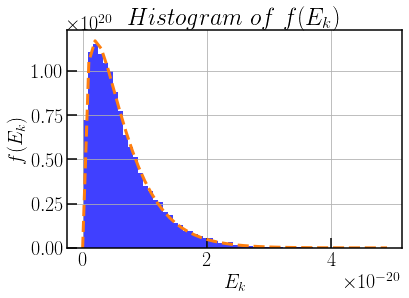

In [28]:
plt.hist(ek, 50, density=True, facecolor='b', alpha=0.75)
plot(xfit,yfit,'--',lw=3)

plt.xlabel(r'$E_k$')
plt.ylabel(r'$f(E_k)$')
plt.title(r'$Histogram\ of\ f(E_k)$')
#plt.text(60, .025)
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.tick_params(direction='in')
plt.grid(True)
plt.show()  

In [29]:
## Answer 1-3

ekavg=sum(ek)/len(ek)
alpha=ekavg/(kb*T)

print(alpha)



1.5120043898255797


In [30]:
## Answer 1-4

var=np.var(ek)
alpha2=var/((kb*T)**2)

print(alpha2)

1.5180410790453105


In [35]:
## Answer 1-5

def ekgenerator2(Tinput):
    ## Here we generate the random number mu with the inverse function methods
    lam=1.0/(kb*Tinput)
    r=np.random.uniform(0,1)
    mu=-(1.0/lam)*math.log(1-r)
    return mu

In [36]:
#Compute the expectation value with the Monte Carlo integral from the inverse function methods

ntest=10000

eavg=0


for i in range(0,ntest):
    ek=ekgenerator2(T)
    eavg+=2*((1.0/(math.pi*kb*T))**0.5)*(ek**1.5)
    
eavg/=ntest

print(eavg/(kb*T))

1.4829329794685646


In [37]:
## Answer 1-6

def ekgenerator3(Ninput,Tinput):
    ## this function generates Ninput number of E_k which follows f(E_k) at Tinput temperature
    ii=0
    ekoutput=list(range(Ninput))
    
    while ii<Ninput:
        ektry,ekjudge=ekgenerator(Tinput)
        if ekjudge==True:
            ekoutput[ii]=ektry
            ii+=1
    return ekoutput



In [38]:
ntest=10000
T=300

ek=ekgenerator3(ntest,T)

v=list(range(ntest))

for i in range(0,ntest):
    v[i]=(2*ek[i]/m)**0.5
    
sigmav=np.var(v)**0.5
sigmav_est=((kb*T)/(2*m))**0.5

print (sigmav/sigmav_est)

0.9549094993006747


## Task 2

In [39]:
## Solution 1

## basic parameters

m=40*1.66*1e-27
kb=1.38*1e-23
hbar=6.62e-34
T=3.0
mu=30*kb*T

print (mu)



1.2419999999999998e-21


In [40]:
# the formula of the f(e),
def fe(einput,Tinput,muinput):
    A=(1.0/(kb*T))*(einput-muinput)
    B=3.5e31
    return B*einput**0.5/(math.e**A+1.0)

In [41]:
# Generating E_k with accept-reject method

def egenerator(Ninput,Tinput,muinput):
    ekcut=60*kb*Tinput
    fmax=1.2e21 # The maximum for f(E_k) which we use as the height for the uniform envelope    
    eoutput=list(range(Ninput))
    ii=0
    while ii<Ninput:
        rx=np.random.uniform(0,ekcut)
        ry=np.random.uniform(0,fmax)
        if ry<fe(rx,Tinput,muinput):
            eoutput[ii]=rx
            ii+=1
            
    return eoutput

    

In [42]:
ntest=10000
e=egenerator(ntest,T,mu)

In [43]:
## draw the fitting functions

xfit=np.arange(0,60*kb*T,1e-23)
yfit=fe(xfit,T,mu)



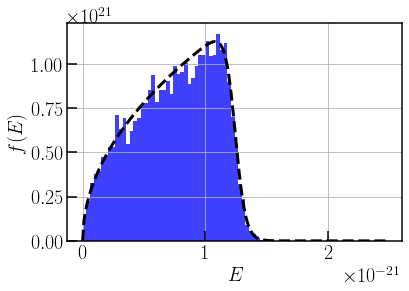

In [44]:
plt.hist(e, 50, density=True, facecolor='b', alpha=0.75)
plot(xfit,yfit,'k--',lw=3)

plt.xlabel(r'$E$')
plt.ylabel(r'$f(E)$')
#plt.title(r'$Histogram\ of\ f(E_k)$')
#plt.text(60, .025)
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.tick_params(direction='in')
plt.grid(True)
plt.show()
    

In [45]:
## Solution 2

eavg=sum(e)/len(e)
C=mu
alpha=eavg/C

print (alpha)
print (eavg/(kb*T))

0.6006878063751642
18.020634191254924
